In [1]:
import random
import pandas as pd

In [2]:
d1=[]
d2=[]
d3=[]
d4=[]
for i in range(50000):
    x=random.random()
    d1.append(x)
    y=random.random()
    d2.append(y)
    z=random.random()
    d3.append(z)
    d4.append(2*x+3*y+z)

In [3]:
df=pd.DataFrame({'x1':d1,'x2':d2,'x3':d3,'x4':d4},index=range(0,50000))

In [4]:
import random

# Generate random data
d1 = [random.random() for _ in range(50000)]
d2 = [random.random() for _ in range(50000)]
d3 = [random.random() for _ in range(50000)]
d4 = [2 * x + 3 * y + z for x, y, z in zip(d1, d2, d3)]

# Create DataFrame
df = pd.DataFrame({'x1': d1, 'x2': d2, 'x3': d3, 'x4': d4})

# Define bin edges and labels
bins = [df["x4"].min(), df["x4"].quantile(0.33), df["x4"].quantile(0.66), df["x4"].max()]
labels = ["Low", "Medium", "High"]

# Create x5 column with bins
df["x5"] = pd.cut(df["x4"], bins=bins, labels=labels, include_lowest=True)

# Display first few rows
print(df.head())

         x1        x2        x3        x4    x5
0  0.181677  0.382919  0.166866  1.678978   Low
1  0.049857  0.144924  0.778699  1.313186   Low
2  0.571295  0.903711  0.830526  4.684248  High
3  0.902972  0.806068  0.956304  5.180453  High
4  0.251321  0.184942  0.529413  1.586882   Low


In [5]:
df["x5_encoded"] = df["x5"].map({"Low": -1, "Medium": 0, "High": 1})

In [6]:
df["x5_encoded"] = df["x5_encoded"].astype(int)

In [7]:
X = df.iloc[:,0:3]
Y = df.iloc[:,5]

In [8]:
Y

0       -1
1       -1
2        1
3        1
4       -1
        ..
49995    1
49996    0
49997    0
49998   -1
49999    0
Name: x5_encoded, Length: 50000, dtype: int32

In [9]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [10]:
df.head()

,x1,x2,x3,x4,x5,x5_encoded
0,0.181677,0.382919,0.166866,1.678978,Low,-1
1,0.049857,0.144924,0.778699,1.313186,Low,-1
2,0.571295,0.903711,0.830526,4.684248,High,1
3,0.902972,0.806068,0.956304,5.180453,High,1
4,0.251321,0.184942,0.529413,1.586882,Low,-1


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [12]:
Y

0       -1
1       -1
2        1
3        1
4       -1
        ..
49995    1
49996    0
49997    0
49998   -1
49999    0
Name: x5_encoded, Length: 50000, dtype: int32

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(9, input_dim=3, activation='relu'),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='softmax')  # 3 output classes: -1, 0, 1
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use sparse categorical crossentropy
              metrics=['accuracy'])

D:\ju\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
h1=model.fit(X_train, y_train, epochs=20)

Epoch 1/20


D:\ju\Lib\site-packages\keras\src\ops\nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
D:\ju\Lib\site-packages\keras\src\losses\losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(32, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3369 - loss: 0.0000e+00
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3376 - loss: 0.0000e+00
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3416 - loss: 0.0000e+00
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3423 - loss: 0.0000e+00
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3345 - loss: 0.0000e+00
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3437 - loss: 0.0000e+00
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3438 - loss: 0.0000e+00
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3400 - loss: 0.0000e+00
Epoch 9/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3423 - loss: 0.0000e+00
Epoch 10/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3441 - loss: 0.0000e+00
Epoch 11/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3372 - loss: 0.0000e+

In [15]:
y_pred=model.predict(X_test)

144/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

D:\ju\Lib\site-packages\keras\src\ops\nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


D:\ju\Lib\site-packages\keras\src\ops\nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


In [16]:
from sklearn.metrics import r2_score,accuracy_score

In [17]:
accuracy_score(y_pred, y_test)

0.3374

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

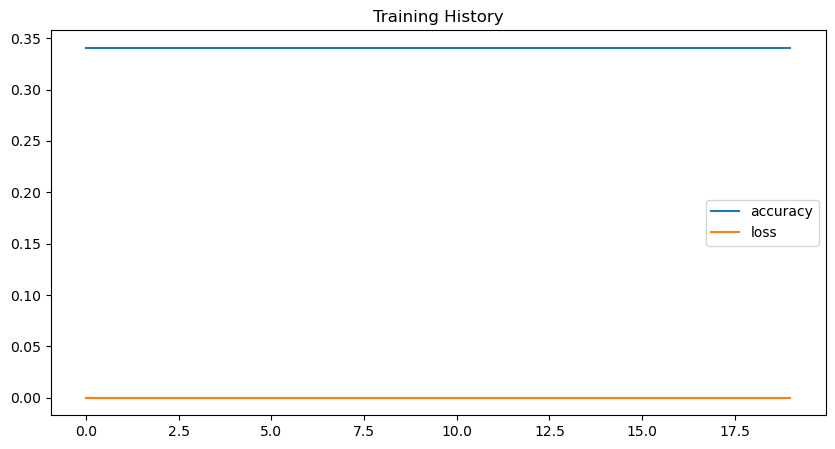

In [19]:
metrics_df = pd.DataFrame(h1.history)

# ✅ Plot training history
metrics_df.plot(figsize=(10, 5), title="Training History")
plt.show()
